# HMS Capstone - Exploratory Analysis 1
## By: AJ Goldstein (https://github.com/ajva1996)

### <span style="color:red">Analysis Goals: </span>
### 1) Investigate the <span style="color:red">distribution of demographics </span>(e.g. age, race, gender, religion, etc.) across the sample.
### 2) Investigate the <span style="color:red">distribution of psychological inflexibility</span> (e.g. AAQ-II scores) across the sample.
### 3) Investigate the <span style="color:red">pairwise relationship</span> between demographics and psychological inflexibility.

In [13]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk")

from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #0: Carry forward data from previous notebook

In [14]:
# cleaned dataset
%store -r HMS

# separated modules
%store -r HMS_ids
%store -r HMS_demo
%store -r HMS_mhstatus
%store -r HMS_mhhelp
%store -r HMS_aaq

# tidy variable groups
%store -r tidy_race
%store -r tidy_religion
%store -r tidy_degreeType
%store -r tidy_fieldOfStudy
%store -r tidy_activity
%store -r tidy_age
%store -r tidy_gender
%store -r tidy_relig

## STEP #1: Sample Demographics

### 0) Create function for graph percentages

In [15]:
def add_percentages(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.0%}'.format(height/len(HMS.age)),
                ha="center")
    return ax

### 1) What's the distribution of <span style="color:red">AGE</span> in respondents?

In [16]:
# break respondents into age groups
ageNames = {18:'18', 19:'19', 20:'20', 21:'21', 22:'22',
             23:'23-25', 24:'23-25', 25:'23-25',
             26:'26-30', 27:'26-30', 28:'26-30', 29:'26-30'}
ageSeries = HMS.age.replace(ageNames, regex=True)
tidy_age.age = ageSeries

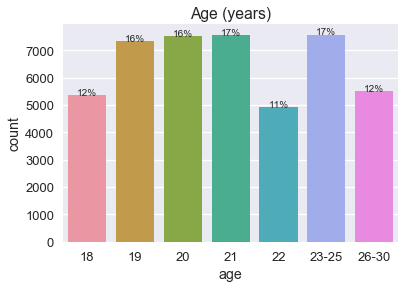

In [17]:
# barplot of age distribution (w/ percentages)
add_percentages(sns.countplot(x = ageSeries, order = ['18','19','20','21','22','23-25','26-30']))
plt.title('Age (years)');

### 2) What's the distribution of <span style="color:red">RACE</span> in respondents?

In [18]:
# simplify race names for readability
raceNames = {'race_white':'WHITE', 'race_black':'BLACK', 'race_his_temp':'LATINO', 'race_asian':'ASIAN',
             'race_ainaan':'AMERIN', 'race_mides':'ARAB', 'race_pi':'PACIF', 'race_other':'OTHER' }
raceSeries = tidy_race.race.replace(raceNames, regex=True)
tidy_race.race = raceSeries

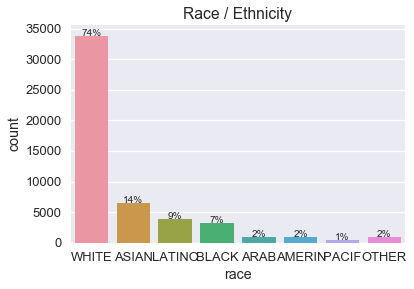

In [19]:
# barplot of race distribution (w/ percentages)
add_percentages(sns.countplot(x = raceSeries, order = ['WHITE','ASIAN','LATINO','BLACK',
                                                                    'ARAB','AMERIN','PACIF','OTHER']))
plt.title('Race / Ethnicity');

### 3) What's the distribution of <span style="color:red">GENDER</span> in respondents?

In [20]:
# simplify gender names for readability
genderNames = {1:'Male', 2:'Female', 3:'Other', 4:'Other', 5:'Other', 6:'Other'}
genderSeries = HMS_demo.gender.replace(genderNames, regex=True)
tidy_gender.gender = genderSeries

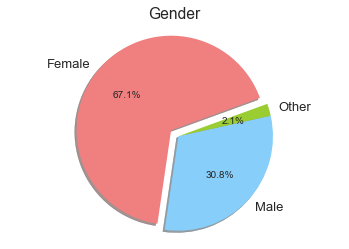

In [21]:
# pie chart of gender distribution
labels = list(genderSeries.value_counts().index)
sizes = list(genderSeries.value_counts().values)
colors = ['lightcoral', 'lightskyblue', 'yellowgreen']
explode = (0.1, 0, 0)  # explode female
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=20, shadow=True)
 
plt.axis('equal')
plt.title('Gender')
plt.show()

### 4) What's the distribution of <span style="color:red">RELIGIOUSNESS</span> in respondents?

In [22]:
# simplify religious levels for readability
religNames = {1:'Very Important', 2:'Important', 3:'Neutral', 4:'Unimportant', 5:'Very Unimportant'}
religSeries = HMS_demo.religios.replace(religNames, regex=True)
tidy_relig.religios = religSeries

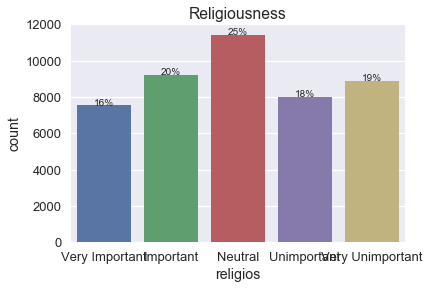

In [23]:
# barplot of Religiousness distribution (w/ percentages)
add_percentages(sns.countplot(x=religSeries, order = ['Very Important', 'Important', 'Neutral', 'Unimportant', 'Very Unimportant']))
plt.title('Religiousness');

### 5) What's the distribution of <span style="color:red">RELIGION</span> in respondents?

In [24]:
# simplify religion names for readability
religionNames_keys = [col for col in HMS_demo.columns if ('relig_aff' in col) & ('text' not in col)]
religionNames_values = ['Agnostic', 'Atheist', 'Buddhist', 'Catholic',
                  'Christian', 'Hindu', 'Jewish', 'Muslim', 'No Pref', 'Other']
religionNames = dict(zip(religionNames_keys,religionNames_values))

religionSeries = tidy_religion.religion.replace(religionNames, regex=True)
tidy_religion.religion = religionSeries

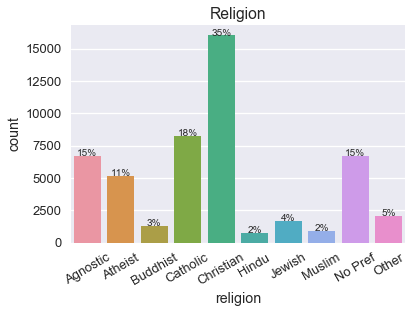

In [25]:
# barplot of religiosity distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=religionSeries));
ax.set_xticklabels(religionNames_values, rotation=30);
plt.title('Religion');

### 6) What's the distribution of <span style="color:red">DEGREE TYPE</span> in respondents?

In [26]:
# simplify degree names for readability
degreeNames_keys = [col for col in HMS_demo.columns if ('degree' in col) & ('text' not in col)]
degreeNames_values = ['Associates', 'Bachelors', 'Masters', 'JD', 'MD', 'PhD', 'Other', 'Non-Degree']
degreeNames = dict(zip(degreeNames_keys,degreeNames_values))

degreeSeries = tidy_degreeType.degreeType.replace(degreeNames, regex=True)
tidy_degreeType.degreeType = degreeSeries

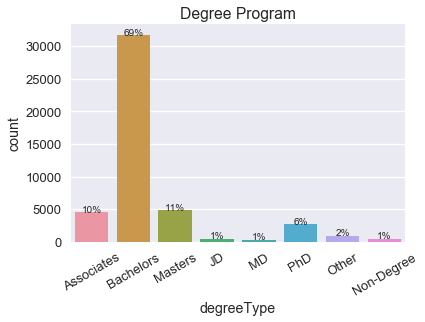

In [27]:
# barplot of degree type distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=degreeSeries))
plt.title('Degree Program')
ax.set_xticklabels(degreeNames_values, rotation=30);

### 7) What's the distribution of <span style="color:red">FIELD OF STUDY</span> in respondents?

In [28]:
# simplify field of study names for readability
fieldNames_keys = [col for col in HMS_demo.columns if ('field' in col) & ('text' not in col)]
fieldNames_values = ['HUM', 'NAT', 'SOC', 'ARC', 'ART', 'BUS','DEN','ED','ENG','LAW',
                     'MED','MUS','NUR','PHARM','PREP','PH','PP','SW','UND','OTHER']
fieldNames = dict(zip(fieldNames_keys, fieldNames_values))

fieldSeries = tidy_fieldOfStudy.fieldOfStudy.replace(fieldNames, regex=True)
tidy_fieldOfStudy.fieldOfStudy = fieldSeries

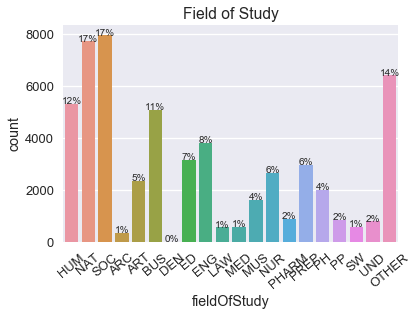

In [29]:
# barplot of field of study distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=fieldSeries))
plt.title('Field of Study')
ax.set_xticklabels(fieldNames_values, rotation=40);

### 8) What's the distribution of <span style="color:red">EXTRACURRICULAR ACTIVITIES</span> in respondents?

In [30]:
# simplify extracurricular names for readability
activityNames_keys = [col for col in HMS_demo.columns if ('activ' in col) & ('text' not in col)]
activityNames_values = ['ACAD', 'ATH_C', 'ATH_V', 'ATH_I', 'COM', 'CUL','DANCE','GREEK','SEX','GOV',
                         'HEALTH','MEDIA','MUSIC', 'RELIG','SOCIAL','ART','OTHER','NONE']
activityNames = dict(zip(activityNames_keys, activityNames_values))

activitySeries = tidy_activity.activity.replace(activityNames, regex=True)
tidy_activity.activity = activitySeries

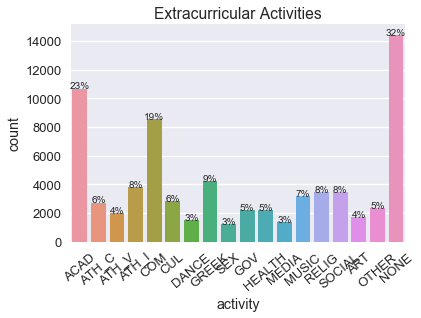

In [31]:
# barplot of extracurricular distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=activitySeries))
plt.title('Extracurricular Activities')
ax.set_xticklabels(activityNames_values, rotation=40);

## STEP #2: Psychological Inflexibility (AAQ-II)

### <span style="color:red">0) A brief overview of the AAQ-II statistic </span>

### 0.1) AAQ-II Questionnaire:

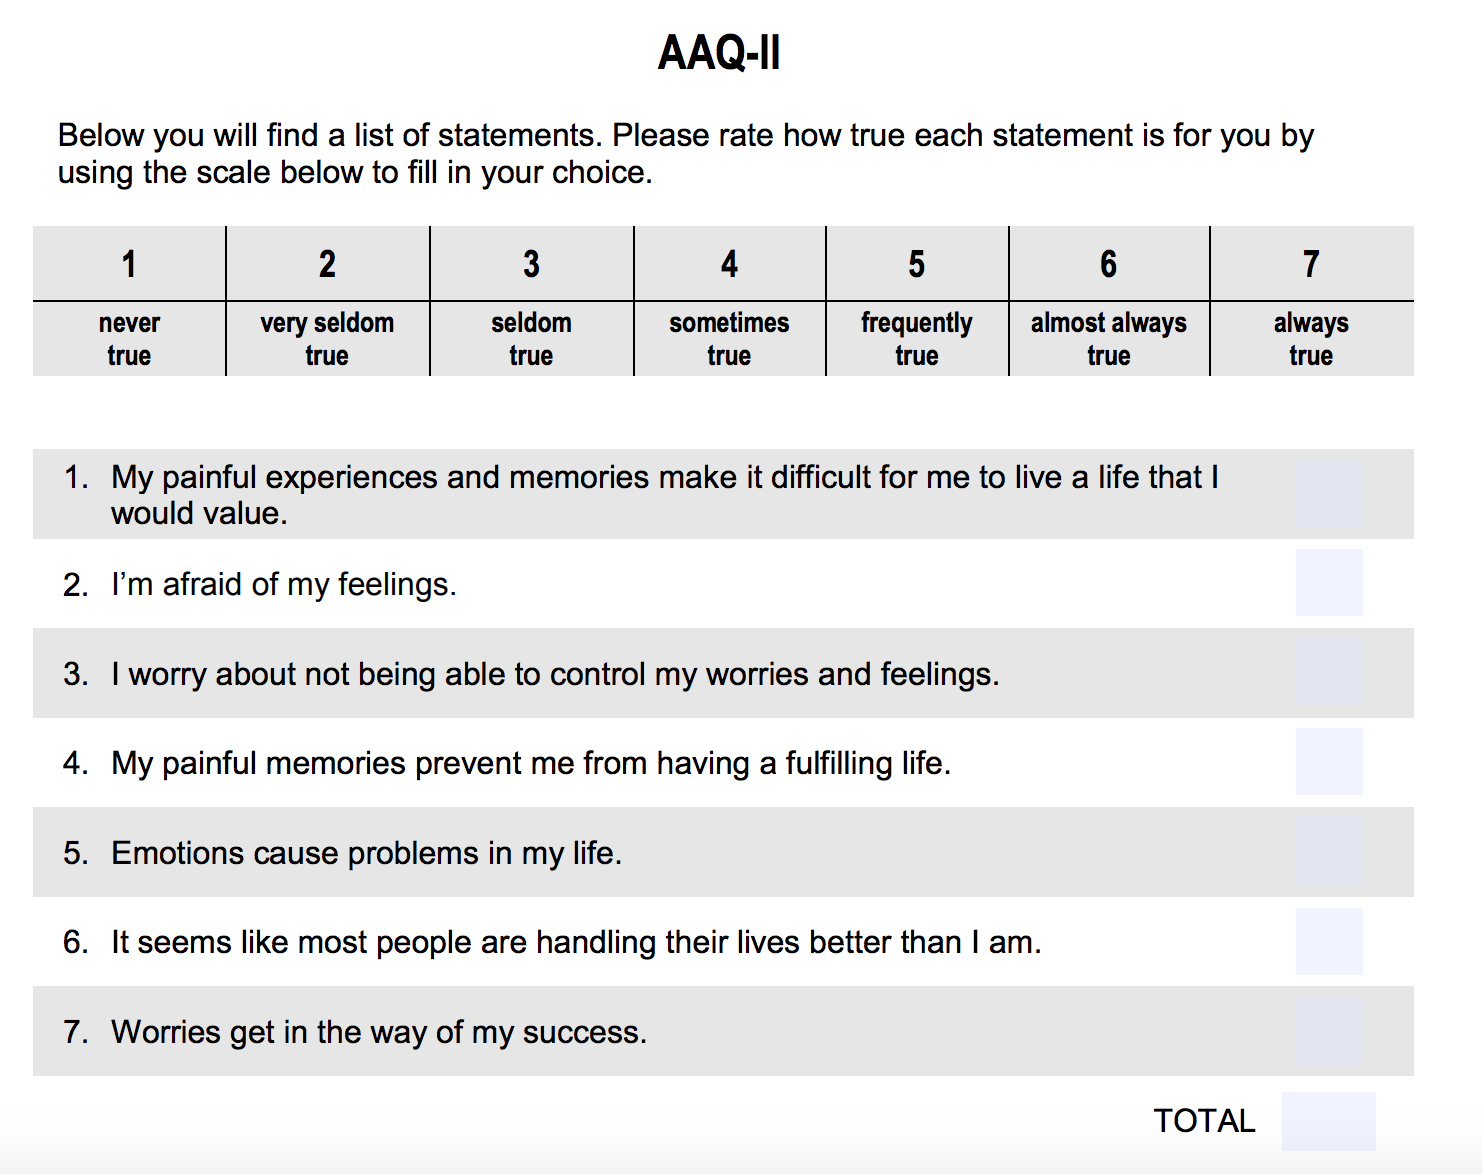

In [32]:
display(Image(filename='images/AAQ_Questions.png', embed=True, width=600))

### 0.2) Notes on the AAQ-II statistic
<li> <span style="color:red"> High AAQ-II = bad, low AAQ-II = good </span>
<li> <span style="color:red">AAQ-II measures "psychological inflexibility" </span>, defined by the ACBS (http://bit.ly/1WB8wRR) as:
     - "the ability to fully contact the present moment and the thoughts & feelings it contains without needless defense, affords, persisting, or changing behavior in the pursuit of goals and values"
    
<li> Psychological flexibility is <span style="color:red">the "bedrock" skill of acceptance-commitment-therapy (ACT)</span> (http://bit.ly/2zFUAnK).
     - ACT is an evidence supported intervention for everything from severe mental illness to leadership and organizational wellbeing.

### 0.3) Accumulating AAQ-II research has shown that...

- AAQ-II has proven to be <span style="color:red"> an accurate measure of psychological flexibility (PF)</span>, with a Cronbach’s alpha of 0.84
    - source: http://bit.ly/2iXF7VH
- Psychological flexibility (PF) is <span style="color:red">positively associated with psychological well-being</span>
    - source: http://bit.ly/2A27fSn
- There is consistently a <span style="color:red"> strong relationship between mindfulness and PF </span>. Both separately and independently account for unique variance in general and specific forms of distress (including depression and anxiety).
    - source: http://bit.ly/2ikJQRP

### 0.4) Table of AAQ-II correlations

#### <span style="color:red"> Summary: AAQ-II has shown to be highly correlated with higher levels of depression, anxiety, stress, and overall psychological distress</span>
- research source: https://www.sciencedirect.com/science/article/pii/S0005789411000888

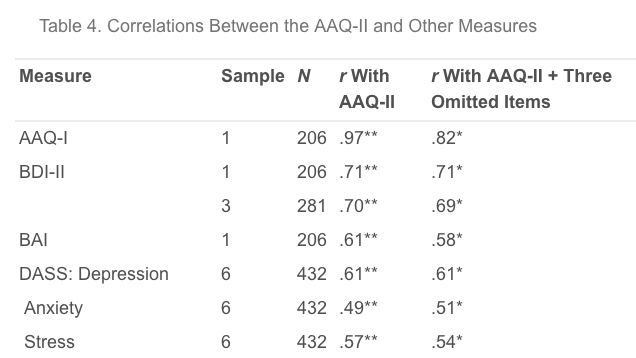

In [33]:
display(Image(filename='images/AAQ-II_Correlations_small.png', embed=True, width=500))

### 1) AAQ individual questions

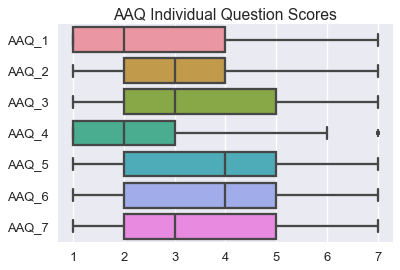

In [65]:
# create boxplots to visualize distributions
sns.boxplot(data=HMS_aaq.drop(['AAQ_total'], axis=1), orient="h");
plt.title('AAQ Individual Question Scores');
plt.savefig('AAQ_individual_scores.png')
plt.show()

In [35]:
# generate summary statistics for each question
HMS_aaq.drop(['AAQ_total'], axis=1).describe();

In [36]:
# investigate correlation of individual questions
HMS_aaq.drop(['AAQ_total'], axis=1).corr();

#### NOTE: Questions 1/4 & 3/7 have very similar wording (i.e. 'painful memories', 'worries'), hence the correlation

### 2) AAQ total score

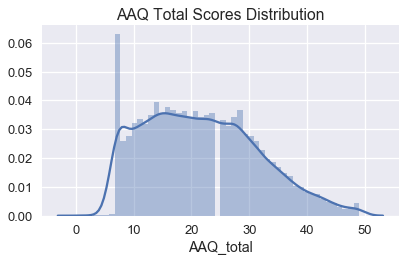

In [117]:
sns.distplot((HMS_aaq.AAQ_total).dropna());
plt.title('AAQ Total Scores Distribution');
plt.savefig('AAQ_total_scores.png')
plt.tight_layout(pad=2)
plt.show()

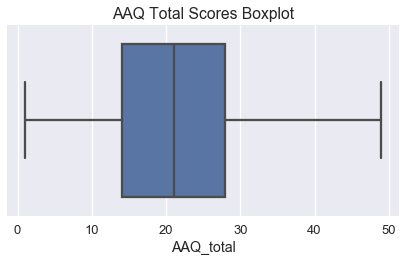

In [118]:
sns.boxplot((HMS_aaq.AAQ_total).dropna());
plt.title('AAQ Total Scores Boxplot')
plt.savefig('AAQ_boxplot.png')
plt.tight_layout(pad=2)
plt.show();

In [63]:
HMS_aaq.AAQ_total.dropna().describe()

count    24997.000000
mean        21.701684
std          9.824509
min          1.000000
25%         14.000000
50%         21.000000
75%         28.000000
max         49.000000
Name: AAQ_total, dtype: float64

## STEP #3: Pairwise - Demographics & Psych Inflexibility

### 1) Age vs. AAQ

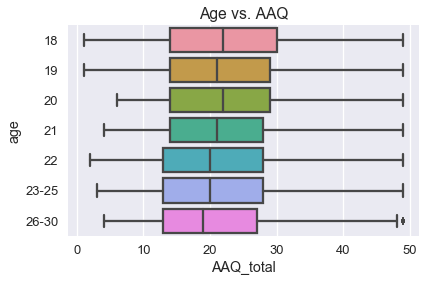

In [100]:
# create side-by-side boxplots for every age group
ageLabels = ['18','19','20','21','22','23-25','26-30']
ax = sns.boxplot(y='age', x='AAQ_total', data = tidy_age, order = ageLabels, orient = 'h');
ax.set_yticklabels(ageLabels);
plt.title('Age vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_age.png')
plt.show()

#### <span style="color:red">NOTE: it appears that as age goes up, AAQ goes down</span>

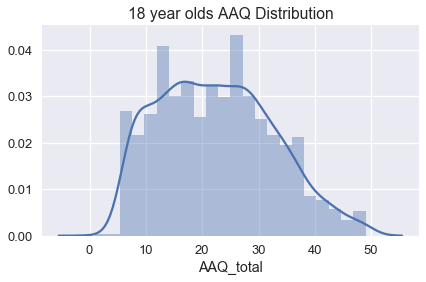

In [103]:
# plot distribution of 18 year olds AAQ scores
sns.distplot(tidy_age[tidy_age.age == '18'].AAQ_total.dropna());
plt.title('18 year olds AAQ Distribution');
plt.tight_layout(pad=1)
plt.savefig('AAQ_age18.png')
plt.show()

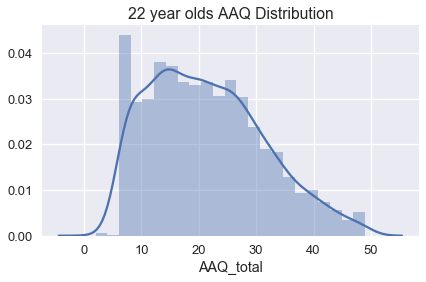

In [104]:
# plot distribution of 26-30 year olds AAQ scores
sns.distplot(tidy_age[tidy_age.age == '22'].AAQ_total.dropna());
plt.title('22 year olds AAQ Distribution');
plt.tight_layout(pad=1)
plt.savefig('AAQ_age22.png')
plt.show()

### 2) Race vs. AAQ

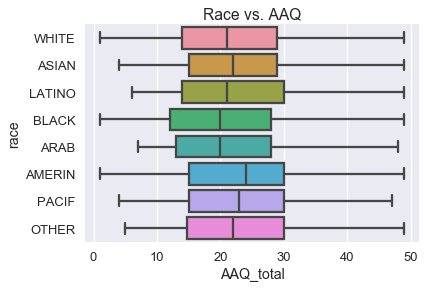

In [105]:
# create side-by-side boxplots for every race
raceLabels = ['WHITE','ASIAN','LATINO','BLACK','ARAB','AMERIN','PACIF','OTHER']
ax = sns.boxplot(y='race', x='AAQ_total', data=tidy_race, order = raceLabels, orient = 'h');
ax.set_yticklabels(raceLabels);
plt.title('Race vs. AAQ');

#### <span style="color:red">NOTE: it appears American Indians have the highest avg AAQ, while Arabs have the lowest</span>

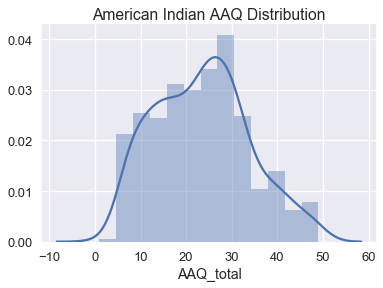

In [106]:
# plot distribution of American Indian AAQ scores
sns.distplot(tidy_race[tidy_race.race == 'AMERIN'].AAQ_total.dropna());
plt.title('American Indian AAQ Distribution');

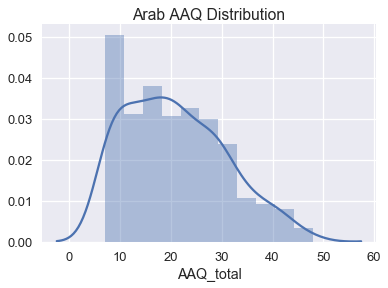

In [107]:
# plot distribution of Arab AAQ scores
sns.distplot(tidy_race[tidy_race.race == 'ARAB'].AAQ_total.dropna());
plt.title('Arab AAQ Distribution');

### 3) Gender vs. AAQ

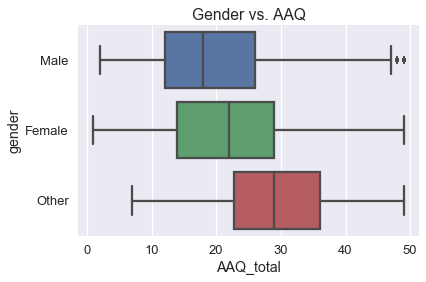

In [108]:
# # create side-by-side boxplots for each gender identity
genderLabels = ['Male', 'Female', 'Other']
ax = sns.boxplot(y='gender', x='AAQ_total', data=tidy_gender, order = genderLabels, orient='h');
ax.set_yticklabels(genderLabels);
plt.title('Gender vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_gender.png')
plt.show()

#### <span style="color:red"> NOTE: it appears Females are more psychologically inflexible than Males, and those who identify as neither have even higher AAQ scores </span>

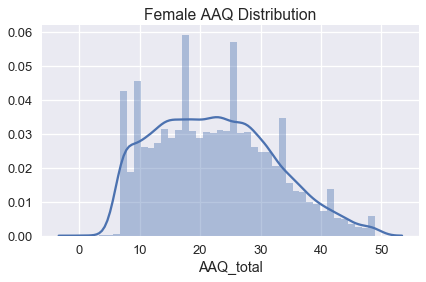

In [109]:
# plot distribution of 'Female' AAQ scores
sns.distplot(tidy_gender[tidy_gender.gender == 'Female'].AAQ_total.dropna());
plt.title("Female AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_female.png')
plt.show()

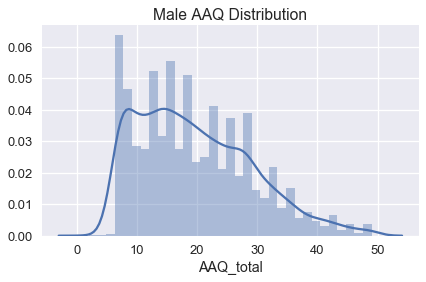

In [110]:
# plot distribution of 'Male' AAQ scores
sns.distplot(tidy_gender[tidy_gender.gender == 'Male'].AAQ_total.dropna());
plt.title("Male AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_male.png')
plt.show()

### 4) Religiousness vs. AAQ

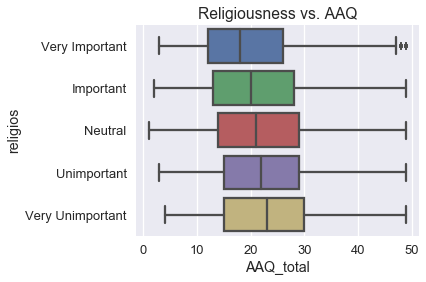

In [111]:
# create side-by-side boxplots for every level of religiousness
religLabels = ['Very Important', 'Important', 'Neutral', 'Unimportant', 'Very Unimportant']
ax = sns.boxplot(y='religios', x='AAQ_total', data=tidy_relig, order = religLabels, orient='h');
ax.set_yticklabels(religLabels);
plt.title('Religiousness vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_religiousness.png')
plt.show()

#### <span style="color:red">NOTE: it appears religiousness is negatively correlated with psychological inflexibility <-- (this is worth investigating further)</span>

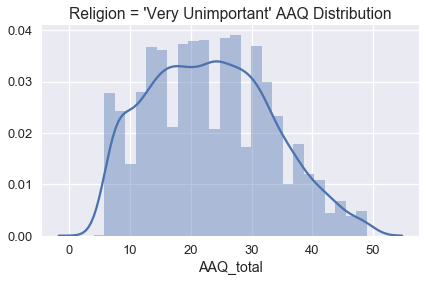

In [112]:
# plot distribution of 'Very Unmportant' AAQ scores
sns.distplot(tidy_relig[tidy_relig.religios == 'Very Unimportant'].AAQ_total.dropna());
plt.title("Religion = 'Very Unimportant' AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_religionU.png')
plt.show()

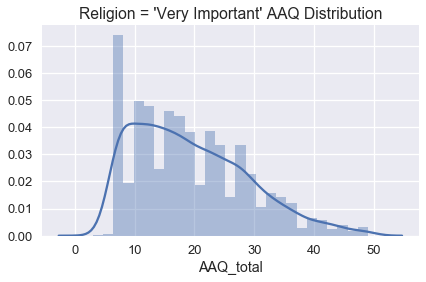

In [113]:
# plot distribution of 'Very Important' AAQ scores
sns.distplot(tidy_relig[tidy_relig.religios == 'Very Important'].AAQ_total.dropna());
plt.title("Religion = 'Very Important' AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_religionI.png')
plt.show()

### 5) Religion vs. AAQ

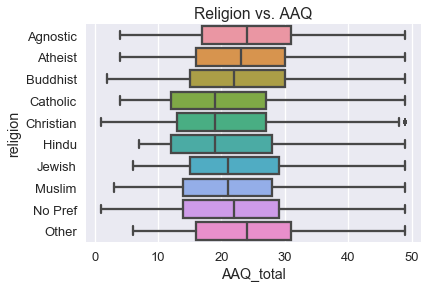

In [114]:
# # create side-by-side boxplots for each religion
religionLabels = ['Agnostic', 'Atheist', 'Buddhist', 'Catholic',
                  'Christian', 'Hindu', 'Jewish', 'Muslim', 'No Pref', 'Other']
ax = sns.boxplot(y='religion', x='AAQ_total', data=tidy_religion, order = religionLabels, orient='h');
ax.set_yticklabels(religionLabels);
plt.title('Religion vs. AAQ');

#### <span style="color:red"> NOTE: it appears Agnostics have the highest AAQ while Christians have the lowest </span>

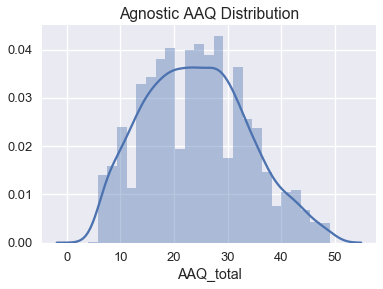

In [51]:
# plot distribution of 'Agnostic' AAQ scores
sns.distplot(tidy_religion[tidy_religion.religion == 'Agnostic'].AAQ_total.dropna());
plt.title("Agnostic AAQ Distribution");

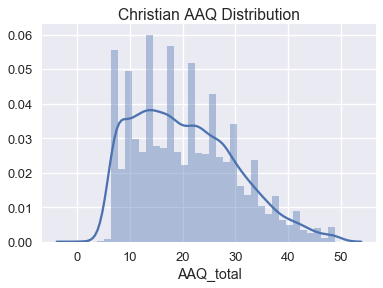

In [52]:
# plot distribution of 'Christian' AAQ scores
sns.distplot(tidy_religion[tidy_religion.religion == 'Christian'].AAQ_total.dropna());
plt.title("Christian AAQ Distribution");

### 6) Degree Type vs. AAQ

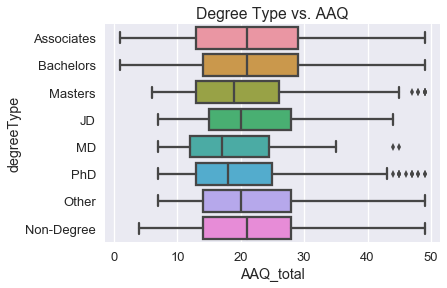

In [53]:
# create side-by-side boxplots for each degree type
degreeLabels = ['Associates', 'Bachelors', 'Masters', 'JD', 'MD', 'PhD', 'Other', 'Non-Degree']
ax = sns.boxplot(y='degreeType', x='AAQ_total', data=tidy_degreeType, order = degreeLabels, orient='h');
ax.set_yticklabels(degreeLabels);
plt.title('Degree Type vs. AAQ');

#### <span style="color:red"> NOTE: it appears Bachelors students have the highest AAQ while MD students have the lowest </span>

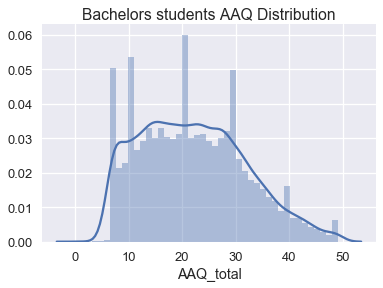

In [54]:
# plot distribution of 'Bachelors' AAQ scores
sns.distplot(tidy_degreeType[tidy_degreeType.degreeType == 'Bachelors'].AAQ_total.dropna());
plt.title("Bachelors students AAQ Distribution");

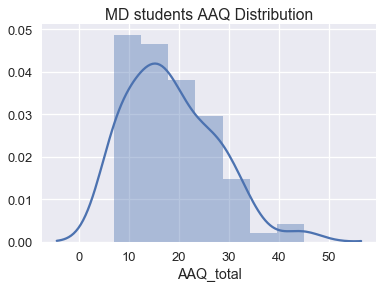

In [55]:
# plot distribution of 'MD' AAQ scores
sns.distplot(tidy_degreeType[tidy_degreeType.degreeType == 'MD'].AAQ_total.dropna());
plt.title("MD students AAQ Distribution");

### 7) Field of Study vs. AAQ

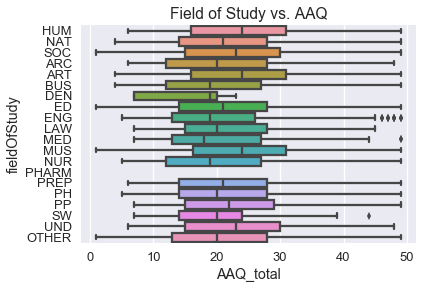

In [56]:
# create side-by-side boxplots for each field of study
fieldLabels = ['HUM', 'NAT', 'SOC', 'ARC', 'ART', 'BUS','DEN','ED','ENG','LAW',
                     'MED','MUS','NUR','PHARM','PREP','PH','PP','SW','UND','OTHER']
ax = sns.boxplot(y='fieldOfStudy', x='AAQ_total', data=tidy_fieldOfStudy, order = fieldLabels, orient='h');
ax.set_yticklabels(fieldLabels);
plt.title('Field of Study vs. AAQ');

#### <span style="color:red"> NOTE: it appears Humanities students have the highest AAQ while Medicine students have the lowest </span>

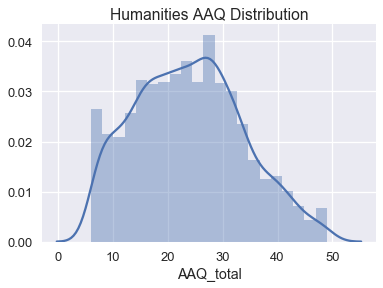

In [57]:
# plot distribution of 'Humanities' AAQ scores
sns.distplot(tidy_fieldOfStudy[tidy_fieldOfStudy.fieldOfStudy == 'HUM'].AAQ_total.dropna());
plt.title("Humanities AAQ Distribution");

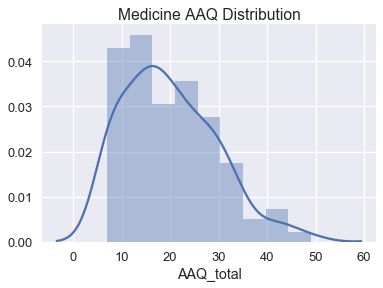

In [58]:
# plot distribution of 'Medicine' AAQ scores
sns.distplot(tidy_fieldOfStudy[tidy_fieldOfStudy.fieldOfStudy == 'MED'].AAQ_total.dropna());
plt.title("Medicine AAQ Distribution");

### 8) Extracurricular Activity vs. AAQ

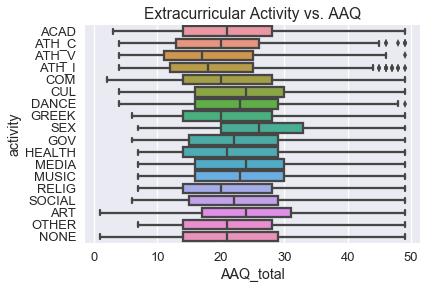

In [59]:
# create side-by-side boxplots for each extracurricular activity
activityLabels = ['ACAD', 'ATH_C', 'ATH_V', 'ATH_I', 'COM', 'CUL','DANCE','GREEK','SEX','GOV',
                         'HEALTH','MEDIA','MUSIC', 'RELIG','SOCIAL','ART','OTHER','NONE']
ax = sns.boxplot(y='activity', x='AAQ_total', data=tidy_activity, order = activityLabels, orient='h');
ax.set_yticklabels(activityLabels);
plt.title('Extracurricular Activity vs. AAQ');

#### <span style="color:red"> NOTE: it appears students involved with Gender/Sexuality Orgs have the highest AAQ, while Varsity Athletes have the lowest</span>

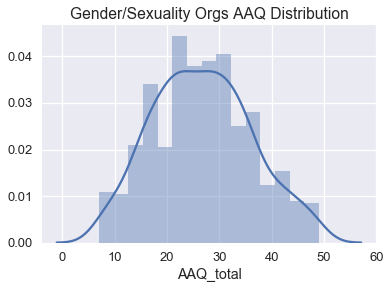

In [60]:
# plot distribution of 'Gender/Sexuality Orgs' AAQ scores
sns.distplot(tidy_activity[tidy_activity.activity == 'SEX'].AAQ_total.dropna());
plt.title("Gender/Sexuality Orgs AAQ Distribution");

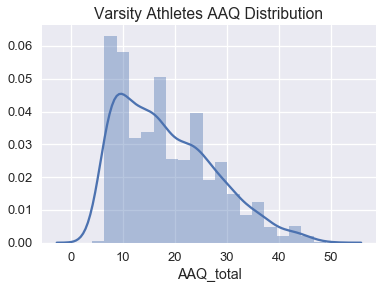

In [61]:
# plot distribution of 'Varsity Athletes' AAQ scores
sns.distplot(tidy_activity[tidy_activity.activity == 'ATH_V'].AAQ_total.dropna());
plt.title("Varsity Athletes AAQ Distribution");

## STEP #4: Pass variables to next Jupyter notebook

In [62]:
# cleaned dataset
%store HMS

# separated modules
%store HMS_ids
%store HMS_demo
%store HMS_mhstatus
%store HMS_mhhelp
%store HMS_aaq

# tidy variable groups
%store tidy_race
%store tidy_religion
%store tidy_degreeType
%store tidy_fieldOfStudy
%store tidy_activity
%store tidy_age
%store tidy_gender
%store tidy_relig

Stored 'HMS' (DataFrame)
Stored 'HMS_ids' (DataFrame)
Stored 'HMS_demo' (DataFrame)
Stored 'HMS_mhstatus' (DataFrame)
Stored 'HMS_mhhelp' (DataFrame)
Stored 'HMS_aaq' (DataFrame)
Stored 'tidy_race' (DataFrame)
Stored 'tidy_religion' (DataFrame)
Stored 'tidy_degreeType' (DataFrame)
Stored 'tidy_fieldOfStudy' (DataFrame)
Stored 'tidy_activity' (DataFrame)
Stored 'tidy_age' (DataFrame)
Stored 'tidy_gender' (DataFrame)
Stored 'tidy_relig' (DataFrame)
